In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [46]:
base_path = "./data"

def read(path: str) -> pd.DataFrame:
    return pd.read_csv(f"{path}.csv")

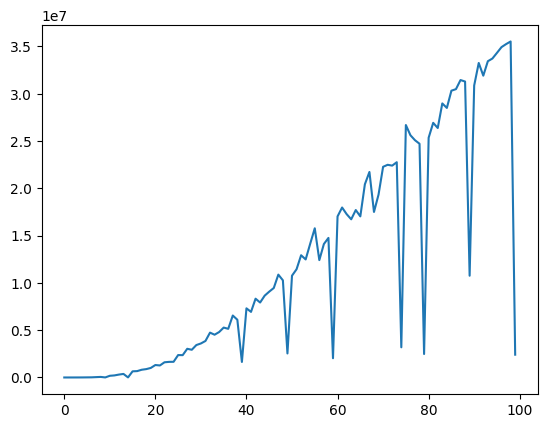

In [11]:
all_sized_datasets = range(1, 101)
times = []
for i in all_sized_datasets:
    filename = f"{base_path}/analytics/sized/balanced_{i}"
    df = read(filename)
    total_time = sum(df["duration"])
    times.append(total_time)

plt.plot(times, label=f"runtime")
plt.savefig(f"{base_path}/results/time_per_battlefields.png")

In [3]:
sized_datasets_available = [3, 5, 8, 10, 15, 25, 35, 50, 75, 100, 120]

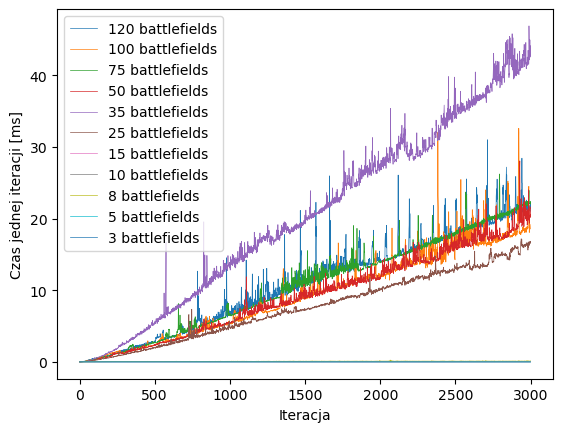

In [49]:
for i in reversed(sized_datasets_available):
    filename = f"{base_path}/analytics/sized/balanced_{i}"
    df = read(filename)
    plt.plot(df['duration']/1000, linewidth=0.5, label=f"{i} battlefields")

plt.xlabel("Iteracja")
plt.ylabel("Czas jednej iteracji [ms]")
plt.legend(loc=2)
plt.savefig(f"{base_path}/results/time_per_step.png", dpi=300)


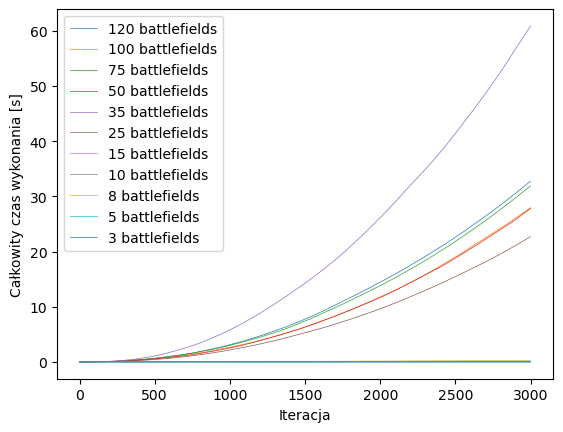

In [50]:
for i in reversed(sized_datasets_available):
    filename = f"{base_path}/analytics/sized/balanced_{i}"
    df = read(filename)
    df['total_time'] = np.cumsum(df['duration'] / 1000000)
    plt.plot(df['total_time'], linewidth=0.5, label=f"{i} battlefields")

plt.xlabel("Iteracja")
plt.ylabel("Całkowity czas wykonania [s]")
plt.legend(loc=2)
plt.savefig(f"{base_path}/results/total_time_after_step.png", dpi=300)

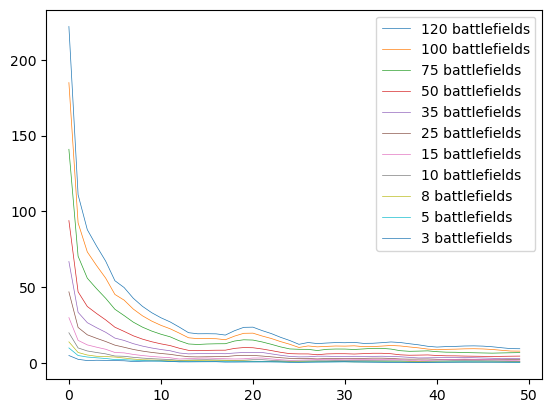

In [51]:
for i in reversed(sized_datasets_available):
    filename = f"{base_path}/analytics/sized/balanced_{i}"
    df = read(filename)
    plt.plot(df['epsilon'][0:50], linewidth=0.5, label=f"{i} battlefields")

plt.legend(loc=1)
plt.savefig(f"{base_path}/results/early_epsilon_after_step.png", dpi=300)

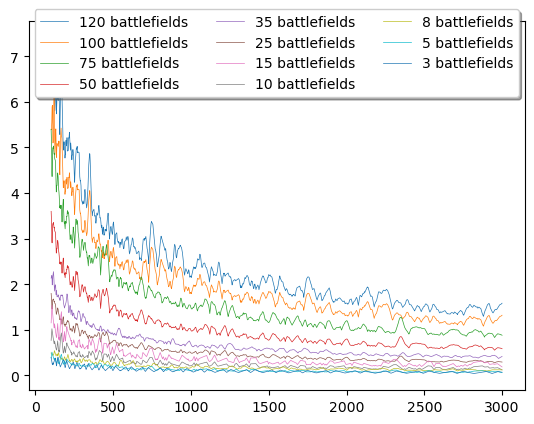

In [52]:
for i in reversed(sized_datasets_available):
    filename = f"{base_path}/analytics/sized/balanced_{i}"
    df = read(filename)
    plt.plot(df['iteration'][100:], df['epsilon'][100:], linewidth=0.5, label=f"{i} battlefields")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, fancybox=True, shadow=True)
plt.savefig(f"{base_path}/results/late_epsilon_after_step.png", dpi=300)

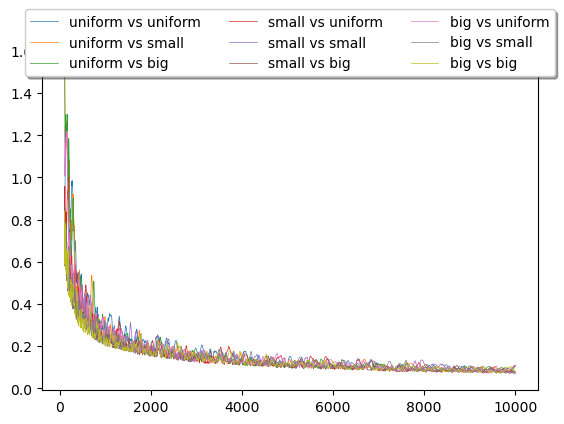

In [53]:
sas = ["uniform", "small", "big"]
sds = ["uniform", "small", "big"]

for i, sa in enumerate(sas):
    for j, sd in enumerate(sds):
        filename = f"{base_path}/analytics/different_strats/t_{i}_{j}"
        df = read(filename)
        plt.plot(df['iteration'][100:], df['epsilon'][100:], linewidth=0.5, label=sa + " vs " + sd)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, fancybox=True, shadow=True)
plt.savefig(f"{base_path}/results/different_strats.png", dpi=600)